In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("results/benchmark_results.csv") 


In [3]:
!pwd

/d/Umich course material/W25/CSE 584 Adv dB/project/Grizzlies/benchmarks


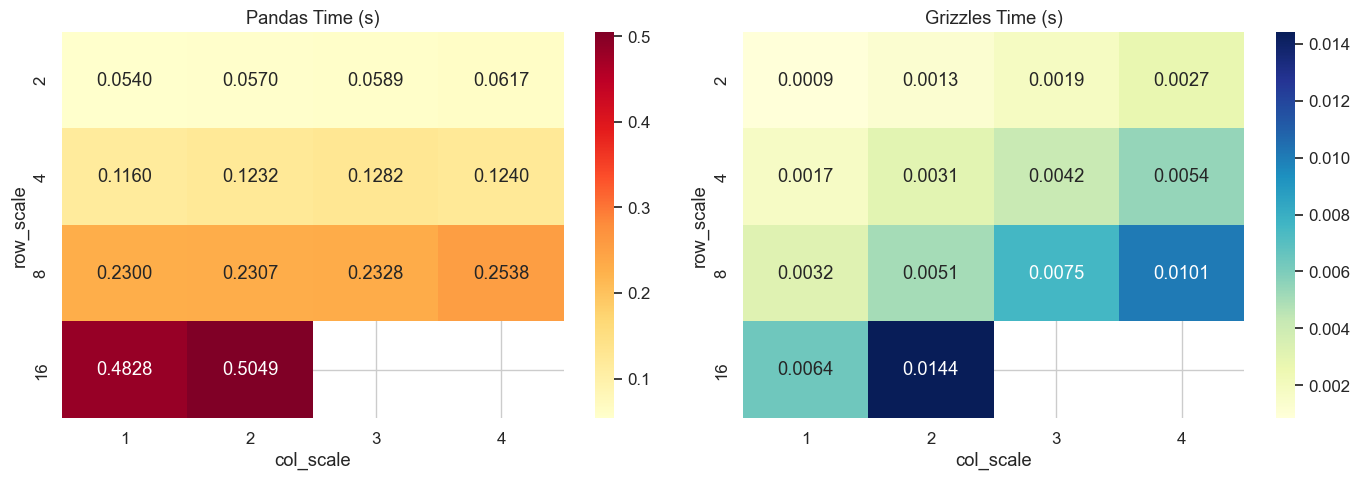

In [5]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Heatmaps of time
pivot_pandas_time = df.pivot(index="row_scale", columns="col_scale", values="pandas_time")
pivot_grizzlies_time = df.pivot(index="row_scale", columns="col_scale", values="grizzlies_time")

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_pandas_time, annot=True, fmt=".4f", cmap="YlOrRd")
plt.title("Pandas Time (s)")
plt.subplot(1, 2, 2)
sns.heatmap(pivot_grizzlies_time, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Grizzles Time (s)")
plt.tight_layout()
plt.show()

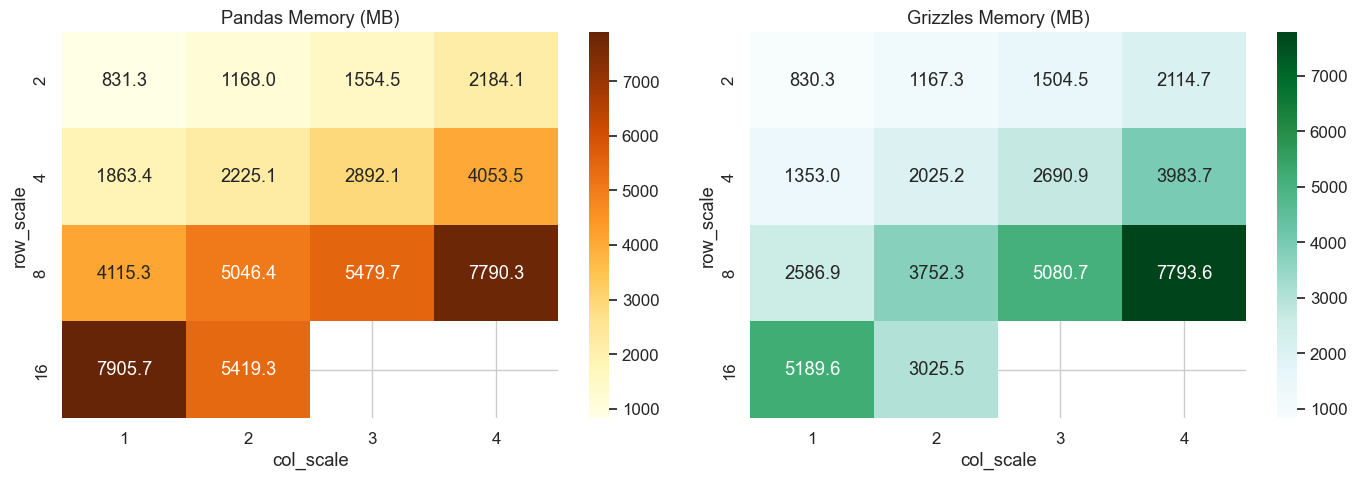

In [6]:
pivot_pandas_mem = df.pivot(index="row_scale", columns="col_scale", values="pandas_memory")
pivot_grizzles_mem = df.pivot(index="row_scale", columns="col_scale", values="grizzlies_memory")

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_pandas_mem, annot=True, fmt=".1f", cmap="YlOrBr")
plt.title("Pandas Memory (MB)")
plt.subplot(1, 2, 2)
sns.heatmap(pivot_grizzles_mem, annot=True, fmt=".1f", cmap="BuGn")
plt.title("Grizzles Memory (MB)")
plt.tight_layout()
plt.show()

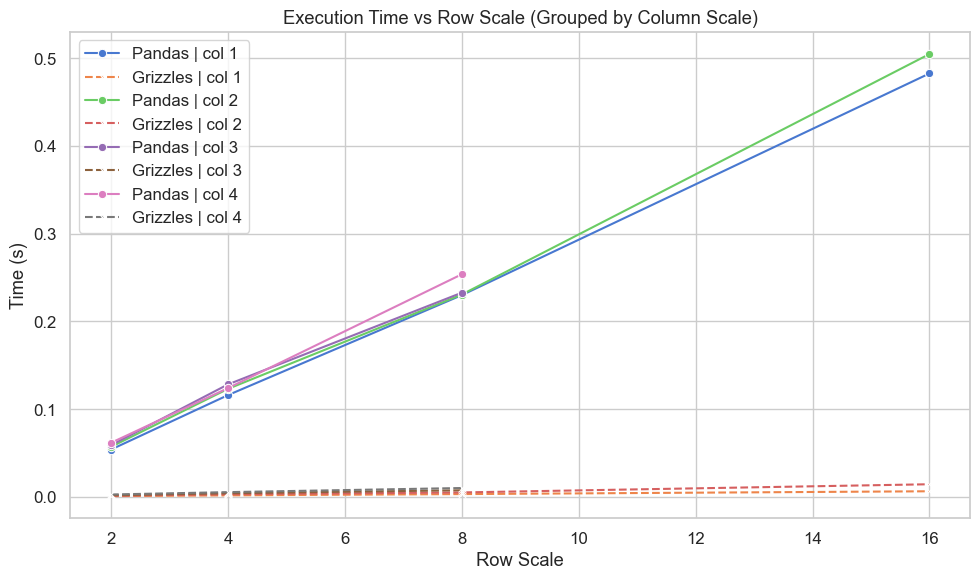

In [9]:
plt.figure(figsize=(10, 6))
for col in sorted(df['col_scale'].unique()):
    subset = df[df['col_scale'] == col].sort_values("row_scale")
    sns.lineplot(x="row_scale", y="pandas_time", data=subset, label=f"Pandas | col {col}", marker="o")
    sns.lineplot(x="row_scale", y="grizzlies_time", data=subset, label=f"Grizzles | col {col}", linestyle="--", marker="x")
plt.title("Execution Time vs Row Scale (Grouped by Column Scale)")
plt.xlabel("Row Scale")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



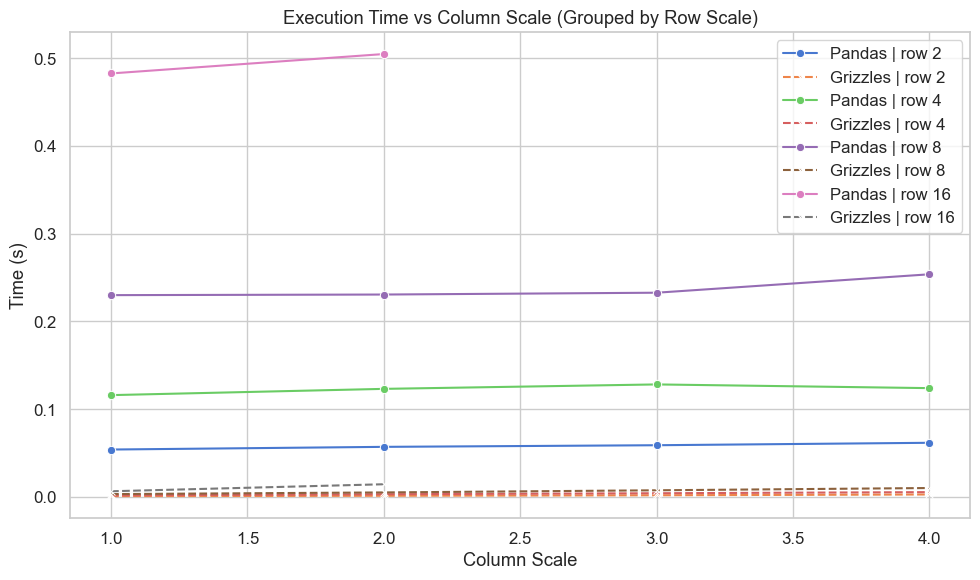

In [8]:
# B. Time vs Col Scale, grouped by row_scale
plt.figure(figsize=(10, 6))
for row in sorted(df['row_scale'].unique()):
    subset = df[df['row_scale'] == row].sort_values("col_scale")
    sns.lineplot(x="col_scale", y="pandas_time", data=subset, label=f"Pandas | row {row}", marker="o")
    sns.lineplot(x="col_scale", y="grizzlies_time", data=subset, label=f"Grizzles | row {row}", linestyle="--", marker="x")
plt.title("Execution Time vs Column Scale (Grouped by Row Scale)")
plt.xlabel("Column Scale")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

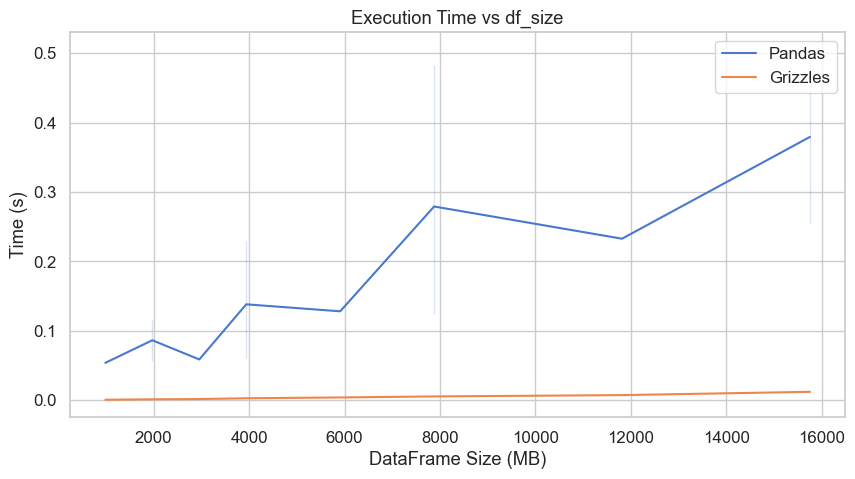

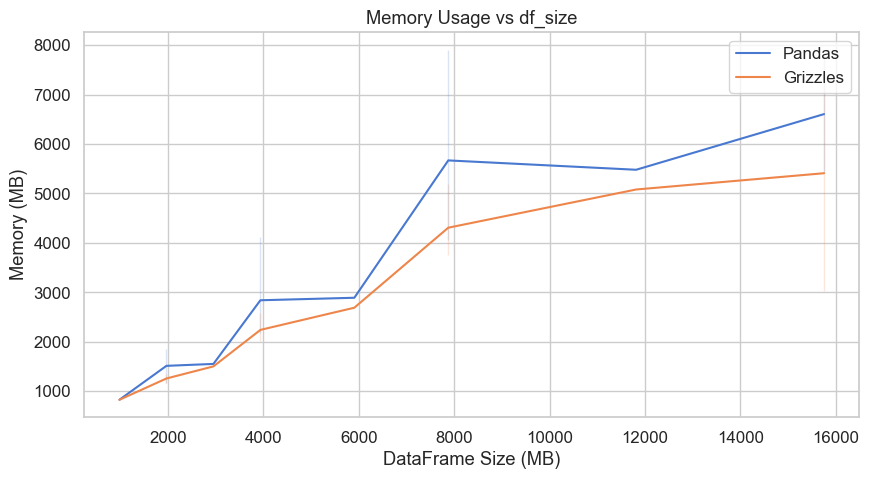

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="df_size", y="pandas_time", label="Pandas")
sns.lineplot(data=df, x="df_size", y="grizzlies_time", label="Grizzles")
plt.title("Execution Time vs df_size")
plt.ylabel("Time (s)")
plt.xlabel("DataFrame Size (MB)")
plt.legend()
plt.show()

# 5. Line plot: Memory vs df_size
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="df_size", y="pandas_memory", label="Pandas")
sns.lineplot(data=df, x="df_size", y="grizzlies_memory", label="Grizzles")
plt.title("Memory Usage vs df_size")
plt.ylabel("Memory (MB)")
plt.xlabel("DataFrame Size (MB)")
plt.legend()
plt.show()

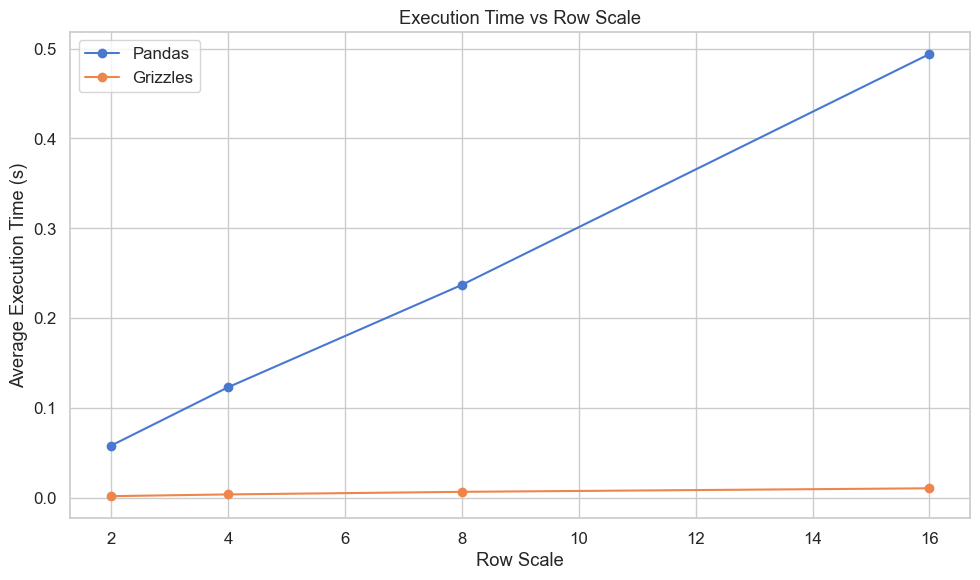

In [49]:
grouped = df.groupby("row_scale").agg({
    "pandas_time": "mean",
    "grizzlies_time": "mean"
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped["row_scale"], grouped["pandas_time"], marker='o', label="Pandas")
plt.plot(grouped["row_scale"], grouped["grizzlies_time"], marker='o', label="Grizzles")
plt.xlabel("Row Scale")
plt.ylabel("Average Execution Time (s)")
plt.title("Execution Time vs Row Scale")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

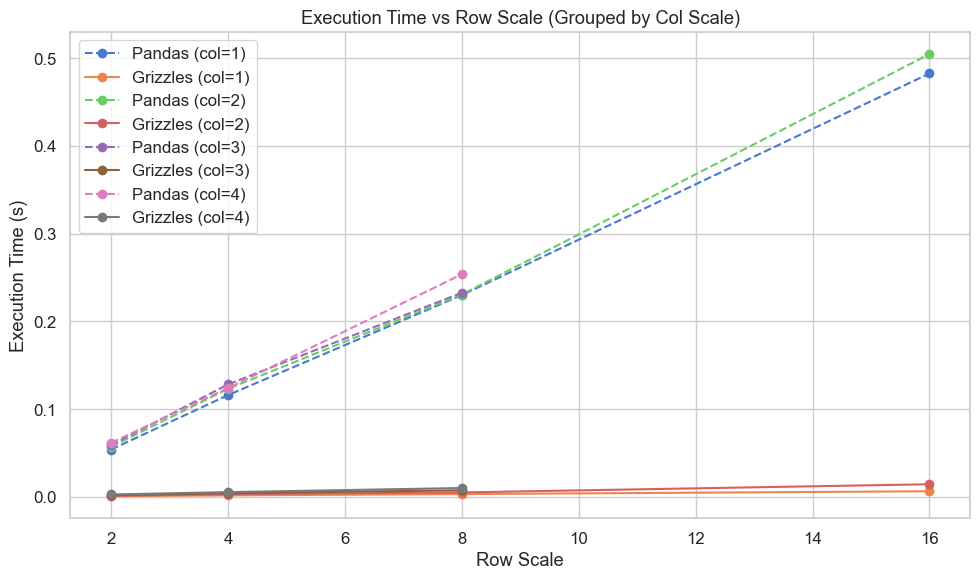

In [22]:
unique_cols = sorted(df["col_scale"].unique())
plt.figure(figsize=(10, 6))

for col in unique_cols:
    sub_df = df[df["col_scale"] == col]
    plt.plot(sub_df["row_scale"], sub_df["pandas_time"], label=f"Pandas (col={col})", linestyle='--', marker='o')
    plt.plot(sub_df["row_scale"], sub_df["grizzlies_time"], label=f"Grizzles (col={col})", marker='o')

plt.xlabel("Row Scale")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Row Scale (Grouped by Col Scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


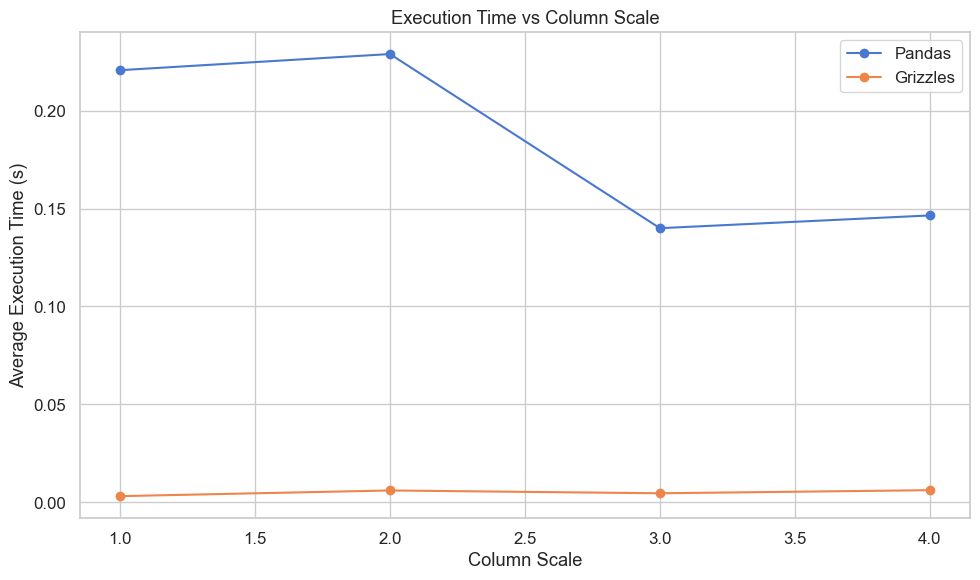

In [23]:
grouped_col = df.groupby("col_scale").agg({
    "pandas_time": "mean",
    "grizzlies_time": "mean"
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_col["col_scale"], grouped_col["pandas_time"], marker='o', label="Pandas")
plt.plot(grouped_col["col_scale"], grouped_col["grizzlies_time"], marker='o', label="Grizzles")
plt.xlabel("Column Scale")
plt.ylabel("Average Execution Time (s)")
plt.title("Execution Time vs Column Scale")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

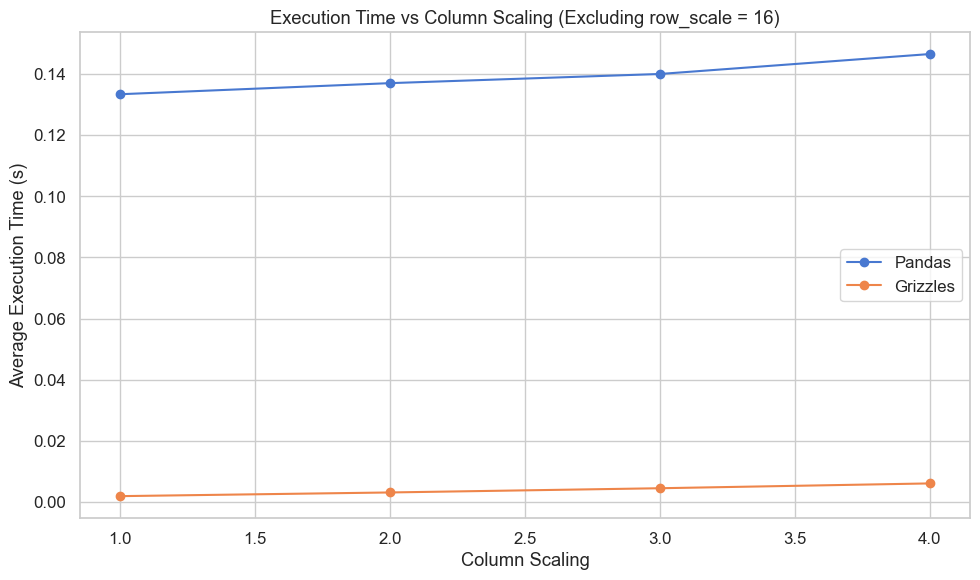

In [47]:
# Exclude row_scale == 16
df_filtered = df[df["row_scale"] != 16]

# Group by col_scale and compute mean execution times
grouped_col = df_filtered.groupby("col_scale").agg({
    "pandas_time": "mean",
    "grizzlies_time": "mean"
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_col["col_scale"], grouped_col["pandas_time"], marker='o', label="Pandas")
plt.plot(grouped_col["col_scale"], grouped_col["grizzlies_time"], marker='o', label="Grizzles")
plt.xlabel("Column Scaling")
plt.ylabel("Average Execution Time (s)")
plt.title("Execution Time vs Column Scaling (Excluding row_scale = 16)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


        df_size  row_scale  col_scale  pandas_time  pandas_memory  \
0    984.544422          2          1     0.053991     831.280859   
4   1969.088680          4          1     0.116027    1863.444141   
8   3938.177196          8          1     0.230032    4115.265234   
12  7876.354228         16          1     0.482795    7905.704297   

    grizzlies_time  grizzlies_memory  
0         0.000851        830.269922  
4         0.001747       1353.019531  
8         0.003195       2586.853125  
12        0.006409       5189.554688  


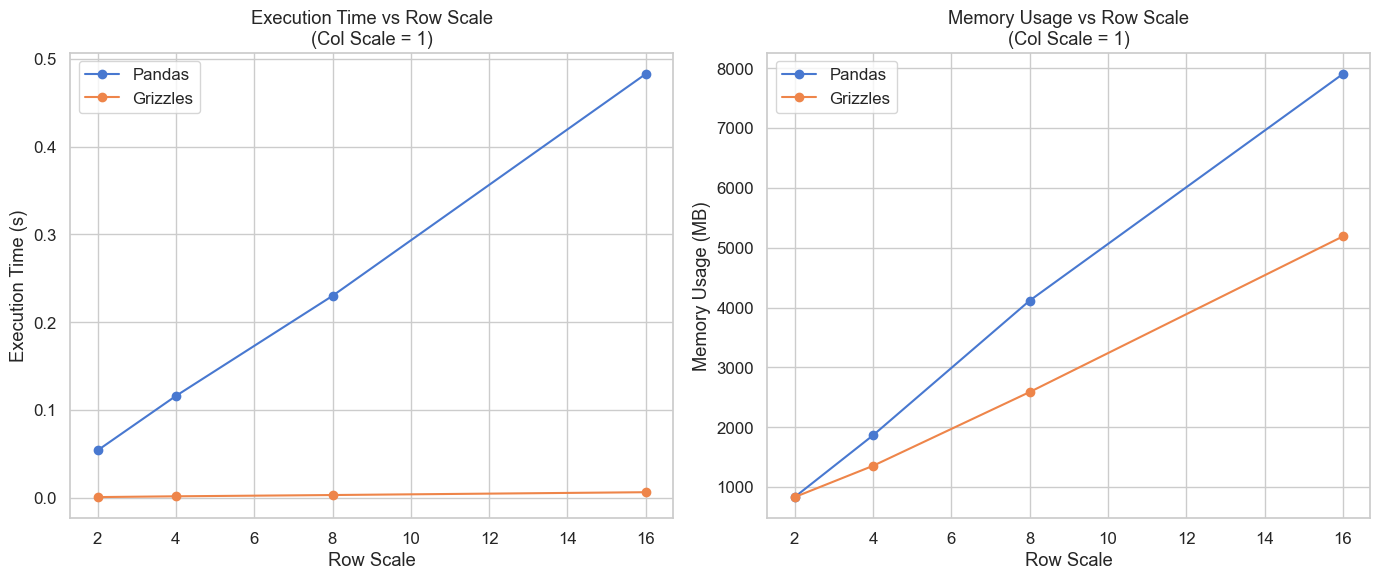

In [69]:

# Exclude row_scale == 16
# df_filtered = df[df["row_scale"] != 16]

df = pd.read_csv("results/benchmark_results.csv")

# Group by col_scale
grouped_col = df[df["col_scale"] == 1]
print(grouped_col)

# Plotting side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Time plot
axs[0].plot(grouped_col["row_scale"], grouped_col["pandas_time"], marker='o', label="Pandas")
axs[0].plot(grouped_col["row_scale"], grouped_col["grizzlies_time"], marker='o', label="Grizzles")
axs[0].set_xlabel("Row Scale")
axs[0].set_ylabel("Execution Time (s)")
axs[0].set_title("Execution Time vs Row Scale\n(Col Scale = 1)")
axs[0].legend()
axs[0].grid(True)

# Memory plot
axs[1].plot(grouped_col["row_scale"], grouped_col["pandas_memory"], marker='o', label="Pandas")
axs[1].plot(grouped_col["row_scale"], grouped_col["grizzlies_memory"], marker='o', label="Grizzles")
axs[1].set_xlabel("Row Scale")
axs[1].set_ylabel("Memory Usage (MB)")
axs[1].set_title("Memory Usage vs Row Scale\n(Col Scale = 1)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


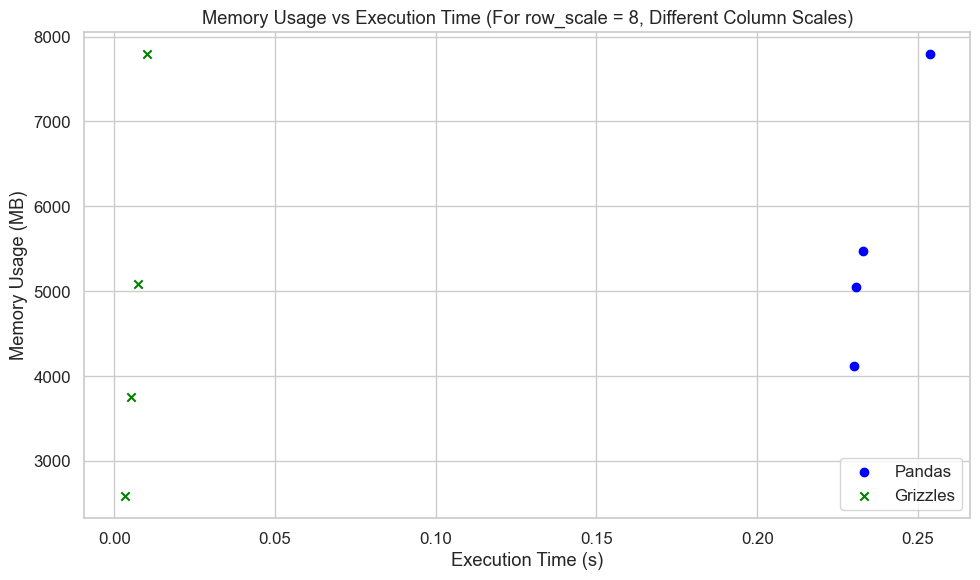

In [34]:
df_filtered = df[df["row_scale"] == 8]

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot memory vs time for Pandas
plt.scatter(df_filtered["pandas_time"], df_filtered["pandas_memory"], color='blue', label="Pandas", marker='o')

# Plot memory vs time for Grizzles
plt.scatter(df_filtered["grizzlies_time"], df_filtered["grizzlies_memory"], color='green', label="Grizzles", marker='x')

# Adding labels and title
plt.xlabel("Execution Time (s)")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage vs Execution Time (For row_scale = 8, Different Column Scales)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

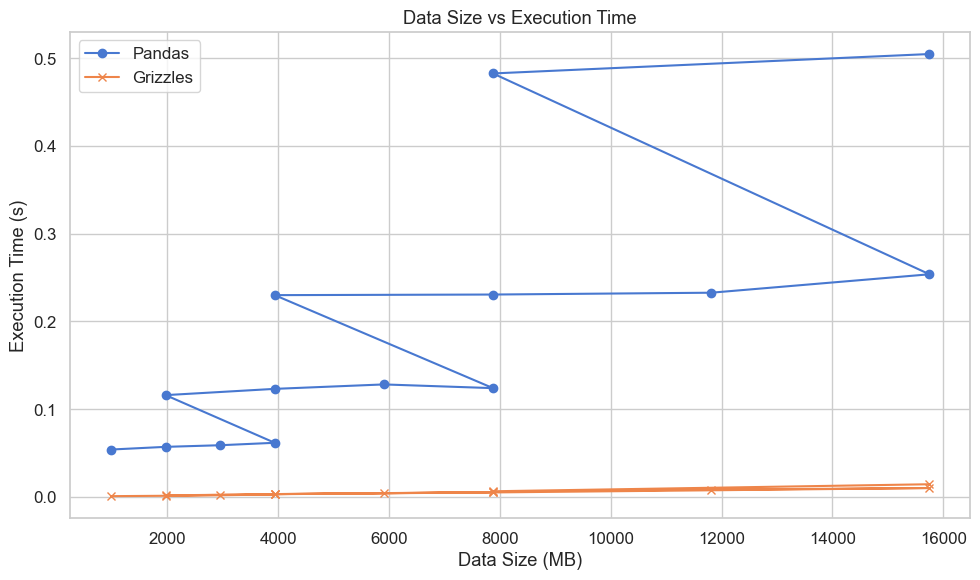

In [36]:


# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot df_size vs pandas_time
plt.plot(df["df_size"], df["pandas_time"], label="Pandas", marker='o')

# Plot df_size vs grizzlies_time
plt.plot(df["df_size"], df["grizzlies_time"], label="Grizzles", marker='x')

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Kiran\AppData\Local\Temp\ipykernel_30928\3485575345.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(row_scales))


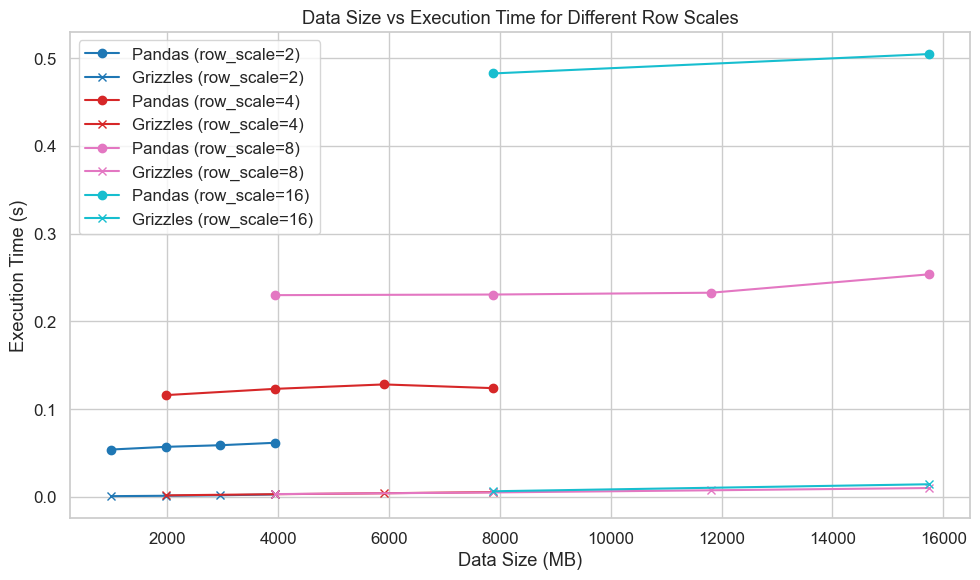

In [38]:

# Define a list of unique row scales
row_scales = sorted(df["row_scale"].unique())

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Set a list of colors to differentiate the row scales
colors = plt.cm.get_cmap('tab10', len(row_scales))

# Plot for each row scale
for idx, row in enumerate(row_scales):
    df_row = df[df["row_scale"] == row]
    plt.plot(df_row["df_size"], df_row["pandas_time"], label=f"Pandas (row_scale={row})", color=colors(idx), marker='o')
    plt.plot(df_row["df_size"], df_row["grizzlies_time"], label=f"Grizzles (row_scale={row})", color=colors(idx), marker='x')

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time for Different Row Scales")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Kiran\AppData\Local\Temp\ipykernel_30928\2519318252.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(row_scales))


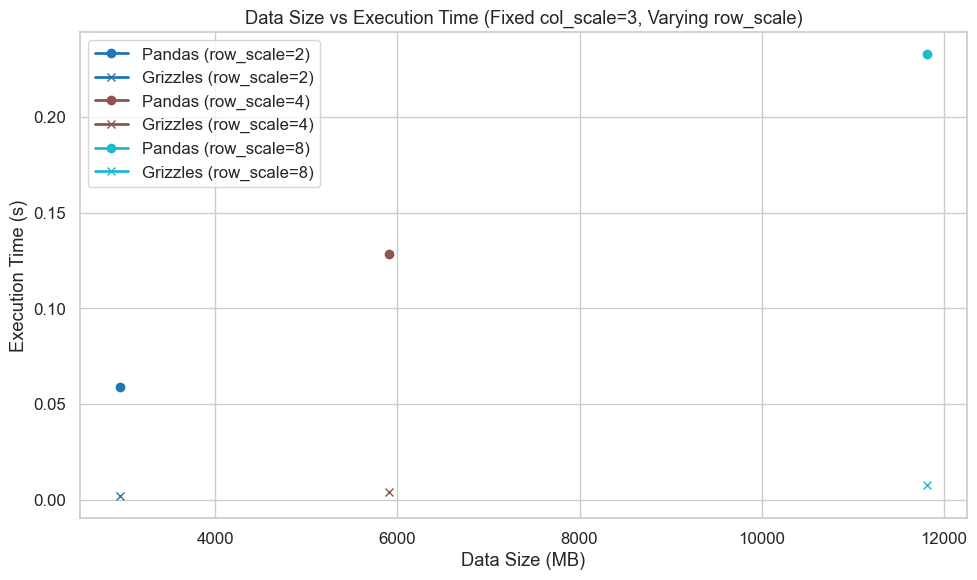

In [40]:


# Filter for a fixed col_scale (e.g., col_scale = 3)
df_filtered = df[df["col_scale"] == 3]

# Define a list of unique row scales
df_filtered = df[df["col_scale"] == 3]

# Define a list of unique row scales
row_scales = sorted(df_filtered["row_scale"].unique())

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Set a list of colors to differentiate the row scales
colors = plt.cm.get_cmap('tab10', len(row_scales))

# Plot for each row scale
for idx, row in enumerate(row_scales):
    df_row = df_filtered[df_filtered["row_scale"] == row]
    plt.plot(df_row["df_size"], df_row["pandas_time"], label=f"Pandas (row_scale={row})", color=colors(idx), marker='o', linestyle='-', linewidth=2)
    plt.plot(df_row["df_size"], df_row["grizzlies_time"], label=f"Grizzles (row_scale={row})", color=colors(idx), marker='x', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time (Fixed col_scale=3, Varying row_scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Kiran\AppData\Local\Temp\ipykernel_30928\4232478500.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(row_scales))


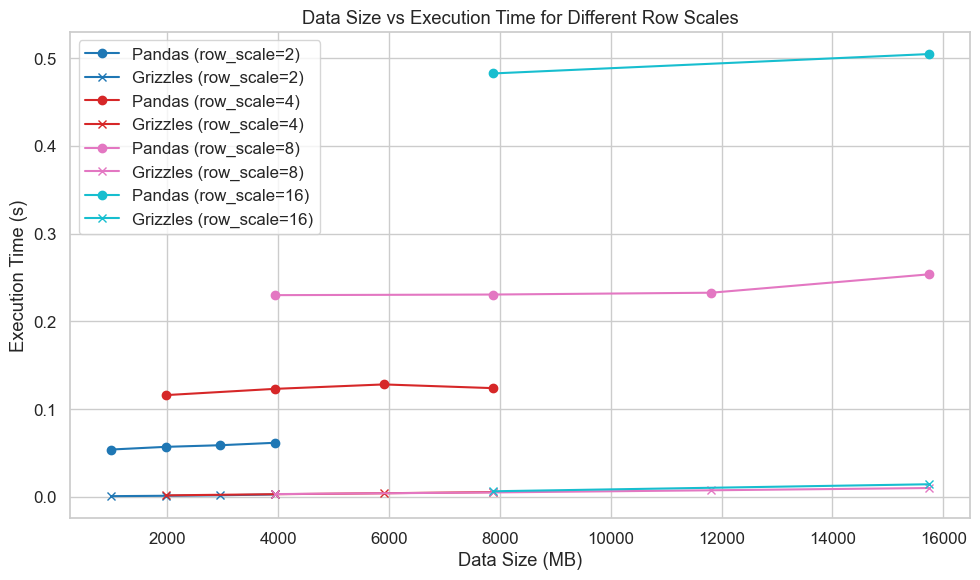

In [42]:


# Define a list of unique row scales
row_scales = sorted(df["row_scale"].unique())

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Set a list of colors to differentiate the row scales
colors = plt.cm.get_cmap('tab10', len(row_scales))

# Plot for each row scale
for idx, row in enumerate(row_scales):
    df_row = df[df["row_scale"] == row]
    plt.plot(df_row["df_size"], df_row["pandas_time"], label=f"Pandas (row_scale={row})", color=colors(idx), marker='o')
    plt.plot(df_row["df_size"], df_row["grizzlies_time"], label=f"Grizzles (row_scale={row})", color=colors(idx), marker='x')

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time for Different Row Scales")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


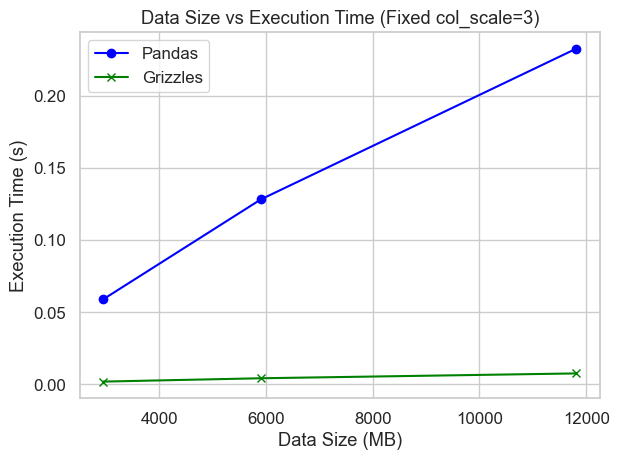

In [44]:


# Filter for a fixed col_scale (e.g., col_scale = 3)
df_filtered = df[df["col_scale"] == 3]

# Plotting the line for Pandas
plt.plot(df_filtered["df_size"], df_filtered["pandas_time"], label="Pandas", marker='o', linestyle='-', color='blue')

# Plotting the line for Grizzles
plt.plot(df_filtered["df_size"], df_filtered["grizzlies_time"], label="Grizzles", marker='x', linestyle='-', color='green')

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time (Fixed col_scale=3)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


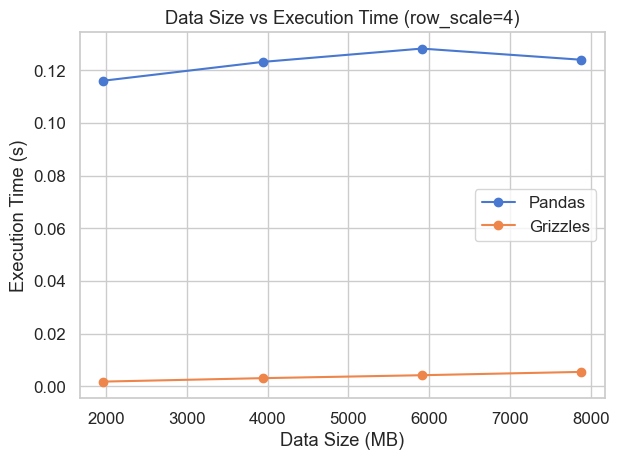

In [73]:
# Filter for a fixed col_scale (e.g., col_scale = 3)
df_filtered = df[df["row_scale"] == 4]

# Plotting the line for Pandas
plt.plot(df_filtered["df_size"], df_filtered["pandas_time"], label="Pandas", marker='o', linestyle='-')

# Plotting the line for Grizzle
plt.plot(df_filtered["df_size"], df_filtered["grizzlies_time"], label="Grizzles", marker='o', linestyle='-')

# Adding labels and title
plt.xlabel("Data Size (MB)")
plt.ylabel("Execution Time (s)")
plt.title("Data Size vs Execution Time (row_scale=4)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

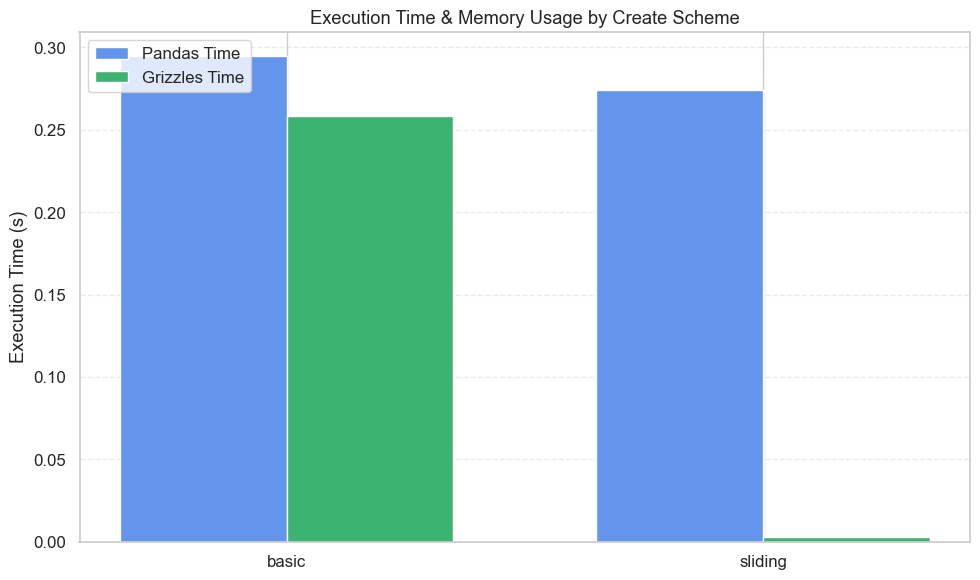

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("results/benchmark_parameters.csv")

# Group by create_scheme
numeric_cols = ["pandas_time", "grizzlies_time", "pandas_memory", "grizzlies_memory"]
agg = df.groupby("create_scheme")[numeric_cols].mean()


# Set up positions for side-by-side bars
labels = agg.index
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Time bars
ax1.bar(x - width/2, agg["pandas_time"], width, label='Pandas Time', color='cornflowerblue')
ax1.bar(x + width/2, agg["grizzlies_time"], width, label='Grizzles Time', color='mediumseagreen')

# Axis labels
ax1.set_ylabel("Execution Time (s)")
ax1.set_title("Execution Time & Memory Usage by Create Scheme")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')


plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


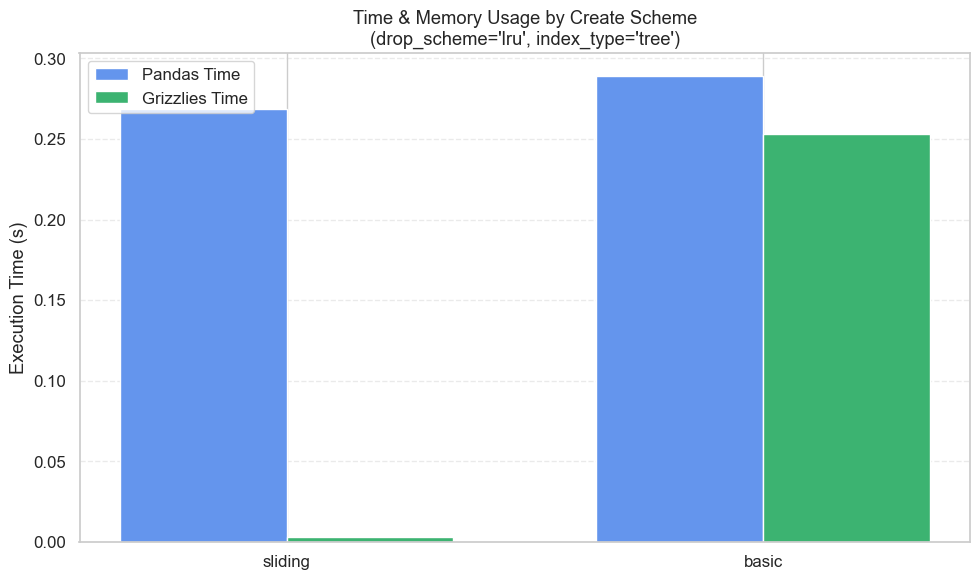

In [88]:
create_cmp = df[(df["drop_scheme"] == "lru") & (df["index_type"] == "ordered") & (df["create_scheme"].isin(["sliding", "basic"]))]

# Labels and positions
labels = create_cmp["create_scheme"]
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(x - width/2, create_cmp["pandas_time"], width, label="Pandas Time", color="cornflowerblue")
ax1.bar(x + width/2, create_cmp["grizzlies_time"], width, label="Grizzlies Time", color="mediumseagreen")
ax1.set_ylabel("Execution Time (s)")
ax1.set_title("Time & Memory Usage by Create Scheme\n(drop_scheme='lru', index_type='tree')")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')



plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

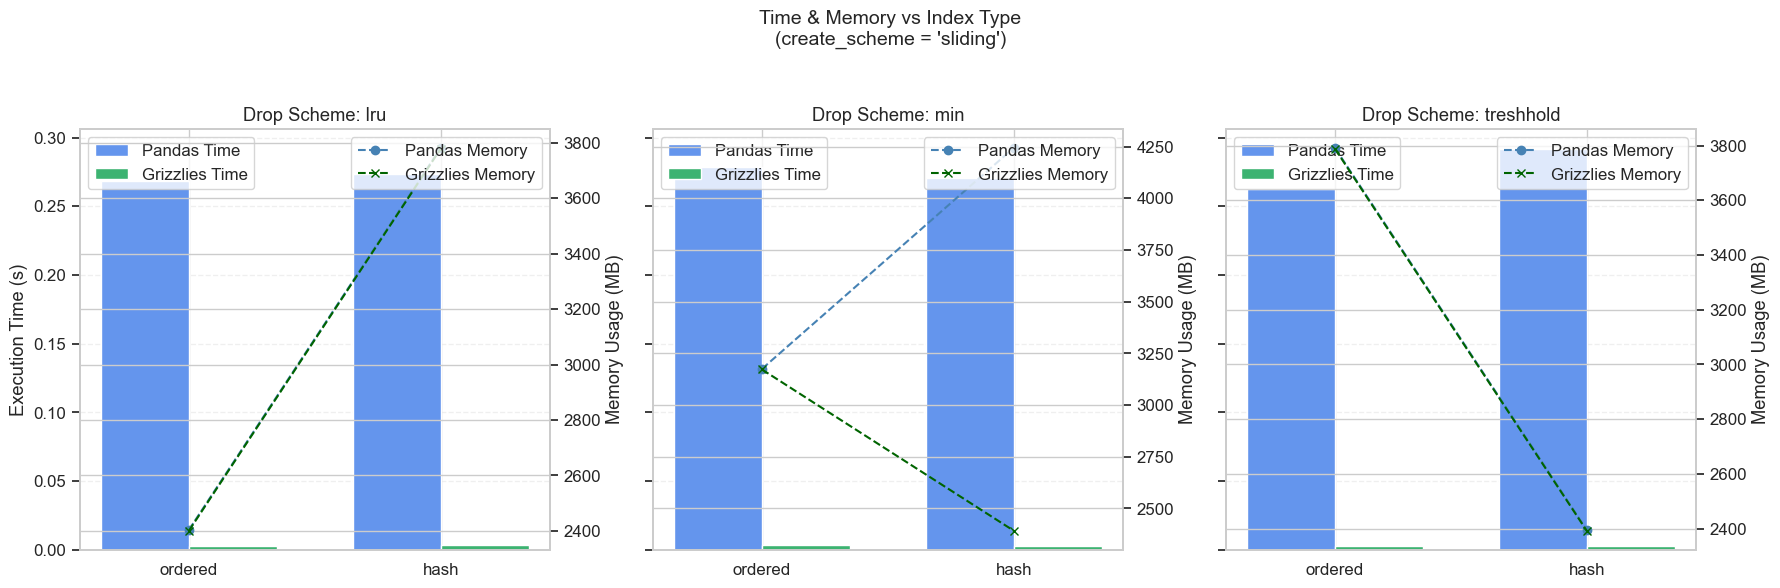

In [85]:
sliding_df = df[df["create_scheme"] == "sliding"]

# Get all unique drop schemes
drop_schemes = sliding_df["drop_scheme"].unique()

# Plot setup
fig, axes = plt.subplots(1, len(drop_schemes), figsize=(6 * len(drop_schemes), 6), sharey=True)

# Handle single subplot case
if len(drop_schemes) == 1:
    axes = [axes]

for i, drop in enumerate(drop_schemes):
    subset = sliding_df[sliding_df["drop_scheme"] == drop]
    labels = subset["index_type"]
    x = np.arange(len(labels))
    width = 0.35

    ax1 = axes[i]
    ax1.bar(x - width/2, subset["pandas_time"], width, label="Pandas Time", color="cornflowerblue")
    ax1.bar(x + width/2, subset["grizzlies_time"], width, label="Grizzlies Time", color="mediumseagreen")
    ax1.set_title(f"Drop Scheme: {drop}")
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.set_ylabel("Execution Time (s)" if i == 0 else "")
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    ax2.plot(x, subset["pandas_memory"], 'o--', color="steelblue", label="Pandas Memory")
    ax2.plot(x, subset["grizzlies_memory"], 'x--', color="darkgreen", label="Grizzlies Memory")
    ax2.set_ylabel("Memory Usage (MB)")
    ax2.legend(loc="upper right")

    ax1.grid(axis="y", linestyle="--", alpha=0.3)

plt.suptitle("Time & Memory vs Index Type\n(create_scheme = 'sliding')", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

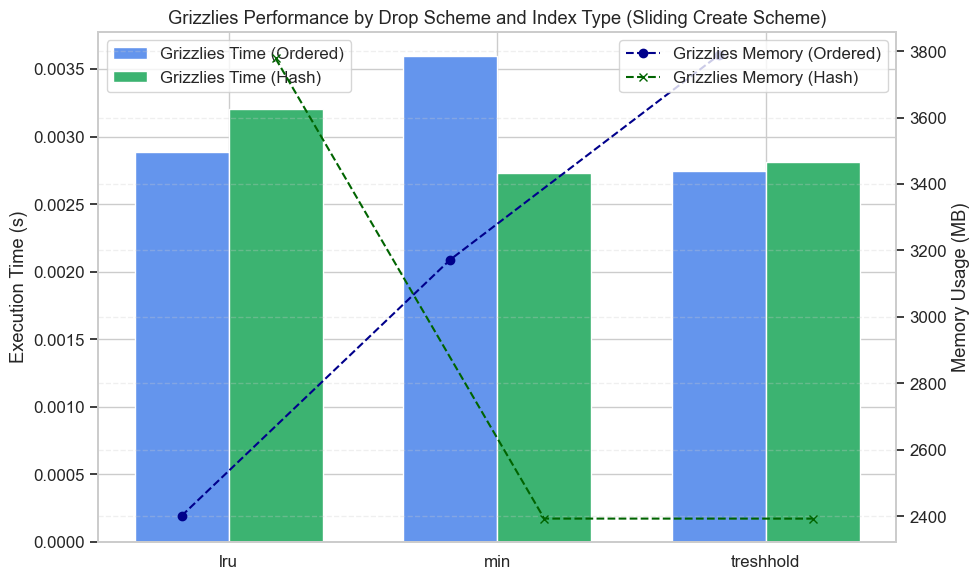

In [87]:
grizzlies_df = df[(df["create_scheme"] == "sliding")]

# Unique drop schemes and index types
drop_schemes = grizzlies_df["drop_scheme"].unique()
index_types = ["ordered", "hash"]
x = np.arange(len(drop_schemes))
width = 0.35

# Set up plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Prepare bar positions
bar1_pos = x - width/2
bar2_pos = x + width/2

# Extract execution time
ordered_time = grizzlies_df[grizzlies_df["index_type"] == "ordered"].sort_values("drop_scheme")["grizzlies_time"].values
hash_time = grizzlies_df[grizzlies_df["index_type"] == "hash"].sort_values("drop_scheme")["grizzlies_time"].values

# Plot time bars
ax1.bar(bar1_pos, ordered_time, width, label="Grizzlies Time (Ordered)", color="cornflowerblue")
ax1.bar(bar2_pos, hash_time, width, label="Grizzlies Time (Hash)", color="mediumseagreen")
ax1.set_ylabel("Execution Time (s)")
ax1.set_xticks(x)
ax1.set_xticklabels(drop_schemes)
ax1.set_title("Grizzlies Performance by Drop Scheme and Index Type (Sliding Create Scheme)")
ax1.legend(loc="upper left")

# Memory overlay (twin axis)
ax2 = ax1.twinx()
ordered_mem = grizzlies_df[grizzlies_df["index_type"] == "ordered"].sort_values("drop_scheme")["grizzlies_memory"].values
hash_mem = grizzlies_df[grizzlies_df["index_type"] == "hash"].sort_values("drop_scheme")["grizzlies_memory"].values
ax2.plot(bar1_pos, ordered_mem, 'o--', color="darkblue", label="Grizzlies Memory (Ordered)")
ax2.plot(bar2_pos, hash_mem, 'x--', color="darkgreen", label="Grizzlies Memory (Hash)")
ax2.set_ylabel("Memory Usage (MB)")
ax2.legend(loc="upper right")

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

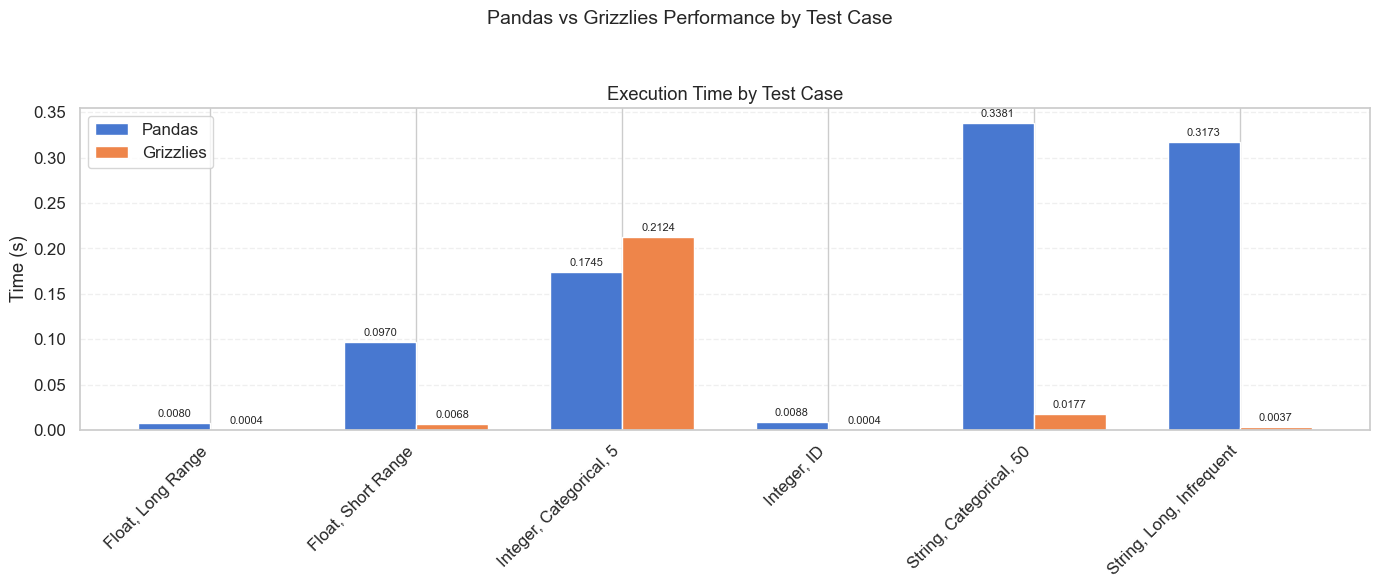

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = df.sort_values("test_case")
x_labels = df["test_case"]
x = np.arange(len(x_labels))
width = 0.35

# Set up figure and axes
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6), sharex=True)

# === Time subplot ===
bars1 = ax1.bar(x - width/2, df["pandas_time"], width, label="Pandas")
bars2 = ax1.bar(x + width/2, df["grizzlies_time"], width, label="Grizzlies")
ax1.set_title("Execution Time by Test Case")
ax1.set_ylabel("Time (s)")
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.3)

# Add labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.4f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)


plt.suptitle("Pandas vs Grizzlies Performance by Test Case", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


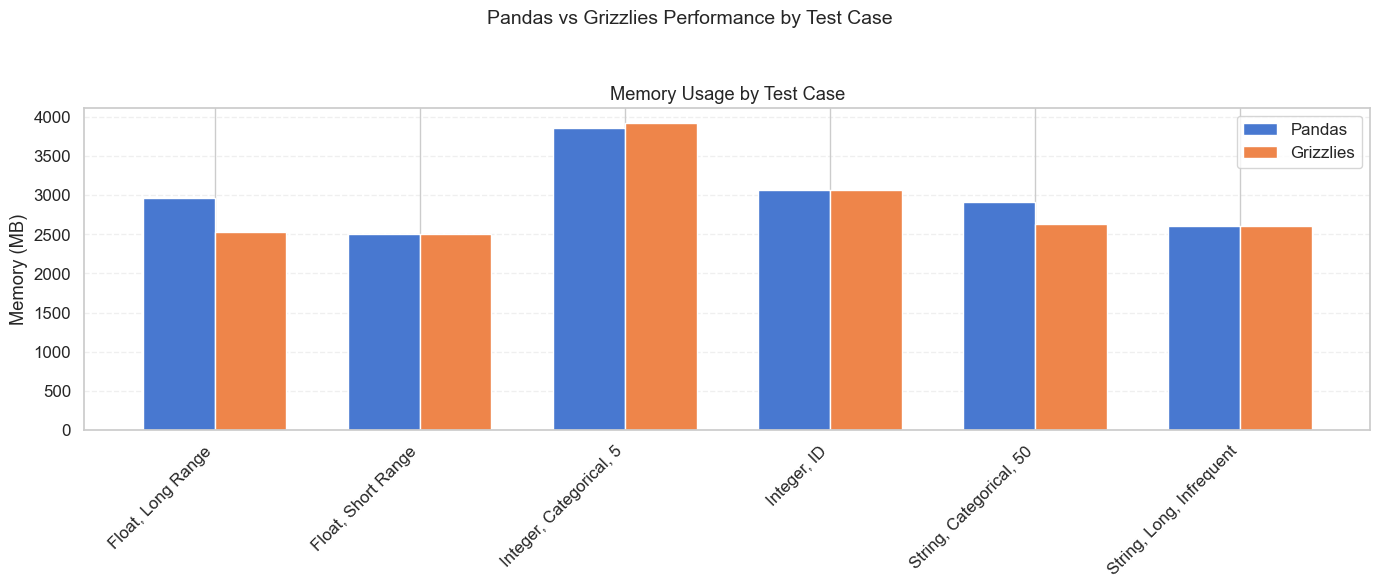

In [99]:
# === Time subplot ===
fig, ax2 = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
ax2.bar(x - width/2, df["pandas_memory"], width, label="Pandas")
ax2.bar(x + width/2, df["grizzlies_memory"], width, label="Grizzlies")
ax2.set_title("Memory Usage by Test Case")
ax2.set_ylabel("Memory (MB)")
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.3)

plt.suptitle("Pandas vs Grizzlies Performance by Test Case", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()